This notebook gathers the different cuts and filtering apply to the raw data

Importation of the libraries

In [2]:
import pandas as pd
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math

In [3]:
from collections import Counter
from itertools import combinations
from tqdm import tqdm
from time import time

Importation of the project modules containing functions from the project package

In [4]:
import ProjectPackage.DataExtraction as de
import ProjectPackage.Kinematic as km
from ProjectPackage import Cut

Importing data

In [5]:
data_folder = 'D:/Data_muons/dimuonData_LHC18m'
run_number = 291944

In [6]:
events = de.read_root_file(data_folder, run=run_number)

Size of the data file : 139.71 Mo.
Extraction took 44.7 s.
Number of events : 1638174.


Cuts on the events (see Cut.py file)

In [5]:
events = Cut.cut_nMuons(events)
events = Cut.cut_CMUL(events)
events = Cut.z_cut(events)
print(f"\nEvents remaining : {len(events)}")

This cut rejects 91.15 % of the statistics
This cut rejects 39.02 % of the statistics
This cut rejects 2.91 % of the statistics

Events remaining : 85869


All data on muon is merge in one table (dataframe object)

In [7]:
df = de.muon_df(events)

Number of tracks : 1095270.
Max number of possible muons pairs : 181436


In [12]:
df

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         24.952721 -1.378636  1.039364 -24.892694      -1  3.947988   
      1          7.629278 -0.342053 -0.248072  -7.616835       1  3.401121   
1     0         40.948765 -3.209173 -1.853931 -40.780560      -1  5.094156   
      1         64.867142  1.026864  7.215225 -64.456345       1  6.399544   
2     0          6.179737  0.252741 -0.019221  -6.173632      -1  2.572474   
...                   ...       ...       ...        ...     ...       ...   
149   1          5.447241  0.258892 -0.273852  -5.433162      -1  3.767282   
150   0         26.937788  0.372978  1.396290 -26.898783      -1  3.092885   
      1          9.183164 -0.736523 -0.851128  -9.113312       1  7.148636   
151   0          8.875800 -1.015173 -0.810806  -8.779560       1  8.354705   
      1          8.251497  0.359323 -0.231717  -8.239736       1  3.137516   

                     xDCA       yDCA      zDCA  
entry subentry                                  
0     0         -0.099592  -0.385877 -5.856949  
      1         18.861176   8.311524 -5.856949  
1     0          0.765852   0.340823 -7.874046  
      1         -1.038053   0.416923 -7.874046  
2     0         16.769291  35.193218 -4.562401  
...                   ...        ...       ...  
149   1         -4.301780 -11.161263  1.739015  
150   0          1.691764   0.871692 -1.780730  
      1          8.179032   8.753128 -1.780730  
151   0         -2.423713  -1.433025  0.486756  
      1        -11.028284   1.926348  0.486756  

[319 rows x 9 columns]

Cut on the acceptance of the detector ($-4.5 < \eta < -2.5$)

In [8]:
df["eta"] = df.apply(lambda x: km.eta(x["Px"], x["Py"], x["Pz"]), axis=1)
df = Cut.cut_eta(df)

This cut rejects 76.47 % of the statistics


At this point, we have :

In [8]:
print(f'Number of tracks : {len(df)}.')
de.max_muons_pairs(df)

Number of tracks : 157441.
Max number of possible muons pairs : 91269


In [9]:
df

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         24.952721 -1.378636  1.039364 -24.892694      -1  3.947988   
      1          7.629278 -0.342053 -0.248072  -7.616835       1  3.401121   
1     0         40.948765 -3.209173 -1.853931 -40.780560      -1  5.094156   
      1         64.867142  1.026864  7.215225 -64.456345       1  6.399544   
2     0          6.179737  0.252741 -0.019221  -6.173632      -1  2.572474   
...                   ...       ...       ...        ...     ...       ...   
149   1          5.447241  0.258892 -0.273852  -5.433162      -1  3.767282   
150   0         26.937788  0.372978  1.396290 -26.898783      -1  3.092885   
      1          9.183164 -0.736523 -0.851128  -9.113312       1  7.148636   
151   0          8.875800 -1.015173 -0.810806  -8.779560       1  8.354705   
      1          8.251497  0.359323 -0.231717  -8.239736       1  3.137516   

                     xDCA       yDCA      zDCA       eta  
entry subentry                                            
0     0         -0.099592  -0.385877 -5.856949 -3.362807  
      1         18.861176   8.311524 -5.856949 -3.585748  
1     0          0.765852   0.340823 -7.874046 -3.093406  
      1         -1.038053   0.416923 -7.874046 -2.876097  
2     0         16.769291  35.193218 -4.562401 -3.886364  
...                   ...        ...       ...       ...  
149   1         -4.301780 -11.161263  1.739015 -3.362762  
150   0          1.691764   0.871692 -1.780730 -3.617669  
      1          8.179032   8.753128 -1.780730 -2.788395  
151   0         -2.423713  -1.433025  0.486756 -2.609237  
      1        -11.028284   1.926348  0.486756 -3.652452  

[272 rows x 10 columns]

In [9]:
df.shape

(157441, 10)

**PDA Cut**

In [10]:
df["P"] = df.apply(lambda x: Cut.p_fc(math.sqrt(x["Px"]**2 +  x["Py"]**2 + x["Pz"]**2), x['thetaAbs']) , axis=1)

In [12]:
df["DCA"] = df.apply(lambda x: math.sqrt(x["xDCA"]**2 +  x["yDCA"]**2 + x["zDCA"]**2), axis=1)
df['pDCA'] = df.P * df.DCA

In [11]:
df[['P', 'DCA', 'pDCA']]

P        DCA        pDCA
entry subentry                                  
0     0         22.552498   5.870492  132.394257
      1          5.228546  21.427301  112.033634
1     0         38.548625   7.918541  305.248878
      1         62.467051   7.953112  496.807424
2     0          3.178833  39.250315  124.770209
...                   ...        ...         ...
1579  0          3.493772   4.570633   15.968747
      1         18.792630   4.675777   87.870153
      2         16.111396   5.033818   81.101840
1580  0          6.328077  19.473932  123.232546
      1          7.377625  15.924335  117.483770

[2906 rows x 3 columns]

In [13]:
N_cut = 4
df['s_pxDCA'] = df.apply(lambda x : Cut.sigma_pxDCA(x['P'], x['thetaAbs'], N=N_cut), axis=1)

In [14]:
df = Cut.cut_pDCA(df, N_cut)
de.max_muons_pairs(df)

This cut rejects 7.46 % of the statistics
Max number of possible muons pairs : 82321


In [32]:
df

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         24.952721 -1.378636  1.039364 -24.892694      -1  3.947988   
      1          7.629278 -0.342053 -0.248072  -7.616835       1  3.401121   
2     0          6.179737  0.252741 -0.019221  -6.173632      -1  2.572474   
      1         17.015997 -1.085680 -1.148373 -16.942123       1  5.207280   
3     0         10.221761 -0.539462 -0.282722 -10.203053       1  3.385718   
...                   ...       ...       ...        ...     ...       ...   
85864 2          6.055975  0.298023  0.266691  -6.041831       1  3.975049   
85866 0          6.571306 -0.273575 -0.017310  -6.564736      -1  2.490599   
      1          5.076169 -0.159755  0.687732  -5.025717      -1  7.634235   
85867 0         56.574596  2.817894  1.663009 -56.479801       1  3.336261   
      1         32.024700  2.023036  0.518164 -31.956362      -1  3.756127   

                     xDCA       yDCA      zDCA       eta          P  \
entry subentry                                                        
0     0         -0.099592  -0.385877 -5.856949 -3.362807  22.552498   
      1         18.861176   8.311524 -5.856949 -3.585748   5.228546   
2     0         16.769291  35.193218 -4.562401 -3.886364   3.178833   
      1         -1.455813  -1.843493 -4.562401 -3.067481  14.615669   
3     0         15.012245 -19.045557  3.036174 -3.512566   7.821215   
...                   ...        ...       ...       ...        ...   
85864 2        -11.712676  -5.151886  0.976765 -3.409419   3.655053   
85866 0         35.016857  30.287893 -3.547436 -3.869478   3.570457   
      1         27.622868   9.959803 -3.547436 -2.660693   2.675069   
85867 0         -0.272721  -0.221081 -2.165346 -3.542460  54.174500   
      1         -0.813806  -0.307710 -2.165346 -3.422214  29.624525   

                      DCA        pDCA    s_pxDCA  
entry subentry                                    
0     0          5.870492  132.394257  56.272847  
      1         21.427301  112.033634  54.469706  
2     0         39.250315  124.770209  80.411387  
      1          5.131605   75.001837  55.400921  
3     0         24.440113  191.151369  54.715767  
...                   ...         ...        ...  
85864 2         12.832879   46.904849  54.324596  
85866 0         46.434051  165.790785  80.462687  
      1         29.577099   79.120795  54.235847  
85867 0          2.193622  118.838362  60.443615  
      1          2.333600   69.131795  57.112016  

[145690 rows x 14 columns]

In [ ]:
counts = Counter(list(df.index.get_level_values(0)))

ind_2 = [k for k, v in counts.items() if v ==2 ]
ind_others = [k for k, v in counts.items() if v > 2 ]

**Di-muons filtering and computation of the invariance mass $M_{inv}$**

In [18]:
args = ['E', 'Px', 'Py', 'Pz', 'Charge']

We can now compute the invariance mass of each di-muons.

In [19]:
t0 = time()
M_inv = []
for idx, data in tqdm(df[args].groupby(level=0)):
    if len(data) == 2:
        if data.Charge.sum() == 0:
            y = km.y(data.E.sum(), data.Pz.sum())
            if Cut.y_cut(y):
                tab = data.to_numpy()[:, 0:-1]
                E1, E2 = tab[:,0]
                P1, P2 = tab[0, 1:],tab[1, 1:]
                M_inv.append(km.inv_mass(E1, E2, P1, P2))
    else:
        tab = data.to_numpy()
        for c in combinations(np.arange(len(data)), 2): # we try every combination of di-muons
            if tab[c, -1].sum()==0: # opposite charges
                # r1, r2 = c
                E1, E2 = tab[c, 0] # extraction of the energy
                P1, P2 = tab[c, 1:-1] # extraction of the impulsion
                M_inv.append(km.inv_mass(E1, E2, P1, P2))

print(f'Execution time : {round(time()-t0, 2)}')
print(f'Total number of di-muons event : {len(M_inv)}')

100%|██████████| 69848/69848 [04:27<00:00, 260.63it/s]


Execution time : 276.04
Total number of di-muons event  68806


In [20]:
M_inv = np.array(M_inv)
np.savetxt('M_inv', M_inv)

**Plot of the invariance mass**

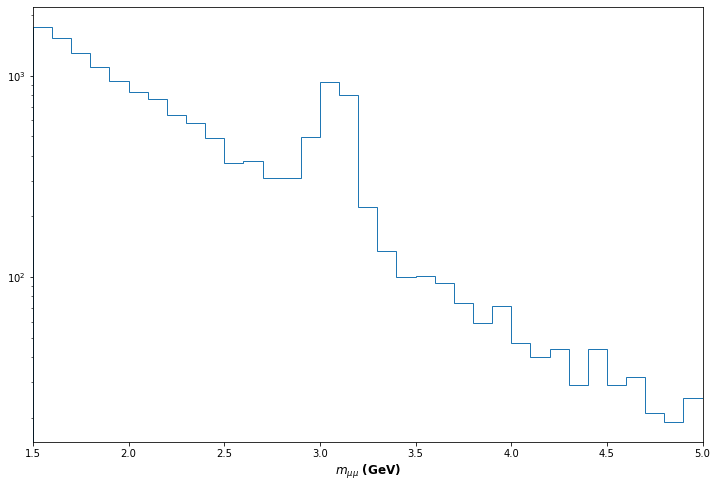

In [31]:
bins = np.linspace(1.5, 5, 36) # width = 0.1 GeV
plt.figure(figsize=(12,8))
plt.xlim(1.5,5)
plt.semilogy()
plt.xlabel("$m_{\mu\mu}$ (GeV)", fontweight='bold', fontsize=12)
h = plt.hist(M_inv, bins=bins, range=[1.5,5], histtype='step', align='mid')

**Let's fit that a bit**

In [22]:
from scipy.optimize import curve_fit
from scipy.stats import crystalball
from itertools import pairwise

First we select the data corresponding to the mass excess

In [23]:
x_c = np.array([(x1 + x2)/2 for x1, x2 in pairwise(h[1])])

In [24]:
m, y = np.array([(x1 + x2)/2 for x1, x2 in pairwise(h[1])]), h[0]

m_min, m_max = 2.7, 3.4 # range of the mass excess

i_min = np.where(m > m_min)[0][0]
i_max = np.where(m < m_max)[0][-1]

x_JP, y_JP = m[i_min:i_max+1], y[i_min:i_max+1]

In [25]:
idx = [i for i in range(i_min)] + [i for i in range(i_max, len(x))]
x_without_JP = m[idx]
y_without_JP = y[idx]

We now want to fit the background with a double exponential function

In [26]:
def double_exp(z, A, k1, k2):
    return A * np.exp(-k1 * z) + np.exp(-k2 * z)

In [27]:
a, t1, t2 = curve_fit(double_exp, x_without_JP, y_without_JP)[0]

C:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 1.0, 'Fit of the background')

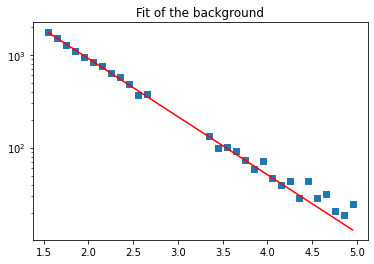

In [29]:
plt.scatter(x_without_JP, y_without_JP, marker='s')
plt.plot(x_without_JP, double_exp(x_without_JP, a, t1, t2), c='r')
plt.semilogy()
plt.title('Fit of the background')

We can now plot the histogram and the difference between the signal and the fitted background

Text(0.05, 0.5, 'Counts per 0.1 GeV')

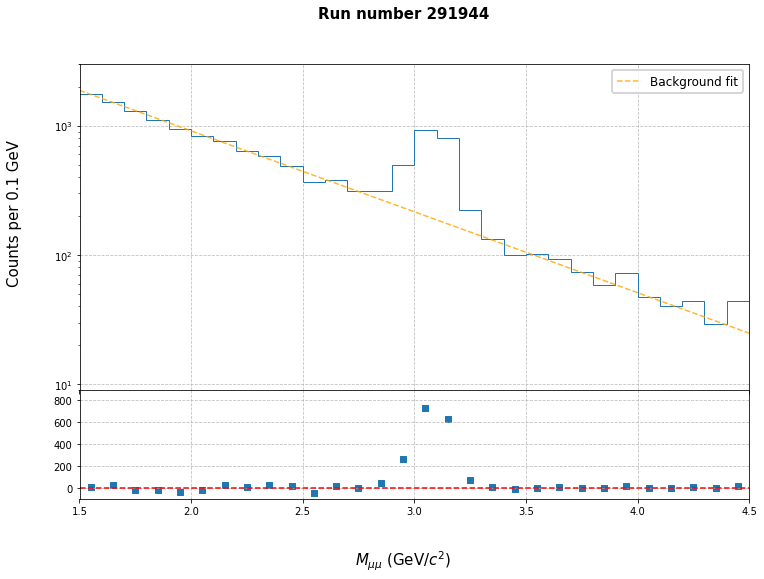

In [30]:
t = np.linspace(1.5, 5, 101)
fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [3,1]}, figsize=(12,8))
fig.suptitle(f'Run number {run_number}', fontsize=15, fontweight='bold')
ax[0].set_xlim(1.5,4.5)
ax[0].semilogy()
ax[0].set_ylim(9,3e3)
ax[0].set_xlabel("$m_{\mu\mu}$ (GeV)", fontweight='bold', fontsize=12)
ax[0].hist(M_inv, bins=bins, range=[1.5,5], histtype='step', align='mid')
ax[0].plot(t, double_exp(t, a, t1, t2), c='orange', linestyle='dashed', alpha=0.8, label='Background fit')
leg = ax[0].legend(fontsize=12)
leg.get_frame().set_linewidth(2.0)
ax[0].grid(linestyle='dashed', alpha=0.8)

ax[1].scatter(x_c, h[0] - double_exp(x, a, t1, t2), marker='s')
ax[1].set_ylim(-100,890)
ax[1].axhline(0, c='r', linestyle='dashed')
ax[1].grid(linestyle='dashed', alpha=0.8)
plt.subplots_adjust(wspace=0, hspace=0)

fig.text(0.5, 0.01, '$M_{\mu\mu}$ (GeV/$c^2$)', ha='center', fontsize=15)
fig.text(0.05, 0.5, 'Counts per 0.1 GeV', ha='center', fontsize=15, rotation='vertical')

In [33]:
df

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         24.952721 -1.378636  1.039364 -24.892694      -1  3.947988   
      1          7.629278 -0.342053 -0.248072  -7.616835       1  3.401121   
2     0          6.179737  0.252741 -0.019221  -6.173632      -1  2.572474   
      1         17.015997 -1.085680 -1.148373 -16.942123       1  5.207280   
3     0         10.221761 -0.539462 -0.282722 -10.203053       1  3.385718   
...                   ...       ...       ...        ...     ...       ...   
85864 2          6.055975  0.298023  0.266691  -6.041831       1  3.975049   
85866 0          6.571306 -0.273575 -0.017310  -6.564736      -1  2.490599   
      1          5.076169 -0.159755  0.687732  -5.025717      -1  7.634235   
85867 0         56.574596  2.817894  1.663009 -56.479801       1  3.336261   
      1         32.024700  2.023036  0.518164 -31.956362      -1  3.756127   

                     xDCA       yDCA      zDCA       eta          P  \
entry subentry                                                        
0     0         -0.099592  -0.385877 -5.856949 -3.362807  22.552498   
      1         18.861176   8.311524 -5.856949 -3.585748   5.228546   
2     0         16.769291  35.193218 -4.562401 -3.886364   3.178833   
      1         -1.455813  -1.843493 -4.562401 -3.067481  14.615669   
3     0         15.012245 -19.045557  3.036174 -3.512566   7.821215   
...                   ...        ...       ...       ...        ...   
85864 2        -11.712676  -5.151886  0.976765 -3.409419   3.655053   
85866 0         35.016857  30.287893 -3.547436 -3.869478   3.570457   
      1         27.622868   9.959803 -3.547436 -2.660693   2.675069   
85867 0         -0.272721  -0.221081 -2.165346 -3.542460  54.174500   
      1         -0.813806  -0.307710 -2.165346 -3.422214  29.624525   

                      DCA        pDCA    s_pxDCA  
entry subentry                                    
0     0          5.870492  132.394257  56.272847  
      1         21.427301  112.033634  54.469706  
2     0         39.250315  124.770209  80.411387  
      1          5.131605   75.001837  55.400921  
3     0         24.440113  191.151369  54.715767  
...                   ...         ...        ...  
85864 2         12.832879   46.904849  54.324596  
85866 0         46.434051  165.790785  80.462687  
      1         29.577099   79.120795  54.235847  
85867 0          2.193622  118.838362  60.443615  
      1          2.333600   69.131795  57.112016  

[145690 rows x 14 columns]

In [34]:
df['p_T'] = df.apply(lambda x : km.p_T(x["Px"], x["Py"]))

AttributeError: module 'ProjectPackage.Kinematic' has no attribute 'p_T'